<h1> Implementation of Gradient Descent</h1>


- To perform an optimization technique know gradient descent to ascertain better estimate for the weights in order to minimize the least mean squares. Using the sample data from the bootcamp class. 

- The goal of every optimization techniques is to obtain better parameter estimate that minimize the cost function of the model. 

In [149]:
#####  Import packages needed for the analysis. 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from  matplotlib import style
style.use("ggplot")

In [150]:
#### Import the dataset using read_csv in pandas package. 
Data = pd.read_csv("train_1.csv")
### Visualize the first five rows of the dataframe
Data.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [151]:
#### Set the id as an index in the dataframe.
Data.set_index("ID",inplace=True)

In [152]:
### Checking the first five elements in the dataframe. 
Data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
ID,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


In [153]:
### Display the shape of the dataframe. 
print("The shape of the data: ",Data.shape)

The shape of the data:  (333, 14)


In [154]:
### The name of the columns in the dataframe. 
Data.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [155]:
### Setting the bias column to 1. 
Data["bias"] = 1
Data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,bias
ID,,,,,,,,,,,,,,,
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,1
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,1
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,1
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,1
7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,1


In [156]:
#### Extract the target variable from the dataset 
y = Data["medv"].values.reshape(-1,1)

In [157]:
#### Extract the 6 features from the data 
X_terms = Data[["indus","rm","age","dis","ptratio","bias"]].values

In [158]:
### Checking the input shape of the features. 
X_terms.shape

(333, 6)

### Gradient descent 

- This is an optimization technique that search for better estimate for the parameters $\theta$ in order to minimize the cost function.

- With gradient descent there two major parameters to tune which can be hyperparameter tuning. Those parameters are: 
  - Number of iteration 
  - learning rate $\alpha$

$$h_{\theta}(x) = \sum_{i=0}^{m} \theta_{i}x_{i} = \theta^{T}X$$

- We set the bias also know intercept to $x_{0}=1$.  <br>

In linear regression we normally define a function to measure the difference between $h_{\theta}(x^{i})$ and $y^{i}$ know as linear cost function. Here is the cost function defined below;

$$ Cost(\theta) = \dfrac{1}{2m}\sum_{i=0}^{m}(y^{i} - h_{\theta}(x^{i})^{2}$$

The function can be derive using maximum likelihood estimation approach.

In order to ascertain $\theta$ value which minimize the cost function, we have to define the learning rule for $\theta$ which is known as Widrow-Hoff learning rule. Define below:

\begin{eqnarray}
\theta_{new} := \theta_{old} + \dfrac{\alpha}{m} (y^{(i)}-h_{\theta}(x^{i}))x_{k}^{i} 
\end{eqnarray}

where the following parameters is defined as follow:<br>
$\alpha$ is the learning rate of the algorithm. <br>
$\theta_{new}$ is the new weight update for each feature.<br>
$\theta_{old}$ is the previous weight for each feature.<br>

The above algorithm is for single update rule in a scenario but in a given vector of $\theta$ we define it as :.
$$\theta_{new} := \theta_{old} + \dfrac{\alpha}{m}\sum_{i=1}^{m}(y^{(i)}-h_{\theta}(x^{i}))x^{i} $$

To this data, we had to select five features to demonstrate how the gradient work. In most cases we have scale the dataset but in our case we did not scale features since we want to illustrate how to implement the gradient descent from the scratch. We observed that the appropriate learning is $\alpha = e^{-5}$  but for the number of iteration it depends on the number of times you want to train the parameters in order to have better estimate of the weights which can minimize the cost estimate of the model. 

- We initialize the weights using the normal distribution rather than setting the parameters to zeros. 

In [222]:
### Define the gradient descent algorithm 
### We set an appropriate learning rate for the algorithm. 
alpha = 1e-5 ### Learning rate for the algorithm 
iteration = 50 ### the number of iteration.
LMS_s = []  ## List of Least mean squares at each iteration. 

#### initialize the weights of the parameters in the model.
weights = np.random.randn(X_terms.shape[1],1) ## Random initialization using normal distribution. 
for m in range(iteration):
    ### predict the y value
    w_1 = weights[0][0]
    w_2 = weights[1][0]
    w_3 = weights[2][0]
    w_4 = weights[3][0]
    w_5 = weights[4][0]
    w_6 = weights[5][0] ### initial weights for the bias.
    y_pred = np.dot(X_terms,weights)
    
    ### measure the difference between the predicted values and observed known as error
    error = y - y_pred
    #### Estimate the Least squares mean define as LSM
    MSE = np.power(error,2)
    LMS = MSE.sum()/(2*y_pred.shape[0])
    LMS_s.append(LMS)
    
    #### Calculate the weights at each iteration. 
    #weights = weights + (alpha/y_pred.shape[0])*(np.dot(error.T,X_terms))
    w_1 = w_1 + (alpha/y_pred.shape[0])*(error*X_terms[0]).sum()
    w_2 = w_2 + (alpha/y_pred.shape[0])*(error*X_terms[1]).sum()
    w_3 = w_3 + (alpha/y_pred.shape[0])*(error*X_terms[2]).sum()
    w_4 = w_4 + (alpha/y_pred.shape[0])*(error*X_terms[3]).sum()
    w_5 = w_5 + (alpha/y_pred.shape[0])*(error*X_terms[4]).sum()
    w_6 = w_6 + (alpha/y_pred.shape[0])*(error).sum() ### weights of the bias in the model.
    
    ### Updating the weights of the model. 
    weights[0][0] = w_1
    weights[1][0] = w_2
    weights[2][0] = w_3
    weights[3][0] = w_4
    weights[4][0] = w_5
    weights[5][0] = w_6 ## The bias terms in the model where we consider x_0 = 1

    print(f"LMS : {LMS} after {m+1}/{iteration} iterations")
    
    

LMS : 1217.860519211404 after 1/50 iterations
LMS : 1018.8915113746687 after 2/50 iterations
LMS : 855.3022376671984 after 3/50 iterations
LMS : 720.743228373903 after 4/50 iterations
LMS : 610.0102025799409 after 5/50 iterations
LMS : 518.8369762982238 after 6/50 iterations
LMS : 443.72587262578156 after 7/50 iterations
LMS : 381.8088377379595 after 8/50 iterations
LMS : 330.7336986244956 after 9/50 iterations
LMS : 288.5710071522531 after 10/50 iterations
LMS : 253.73774082155032 after 11/50 iterations
LMS : 224.93480663452584 after 12/50 iterations
LMS : 201.09584796750627 after 13/50 iterations
LMS : 181.34530746323392 after 14/50 iterations
LMS : 164.96406993027546 after 15/50 iterations
LMS : 151.36131295298543 after 16/50 iterations
LMS : 140.05144157152523 after 17/50 iterations
LMS : 130.63518697144642 after 18/50 iterations
LMS : 122.7841157995389 after 19/50 iterations
LMS : 116.22793318811398 after 20/50 iterations
LMS : 110.74407430137732 after 21/50 iterations
LMS : 106.1

In [223]:
### display the final estimate after 30 iterations. 
print("The values for weights: \n",weights)

The values for weights: 
 [[ 0.29005193]
 [-1.08881174]
 [ 0.02512749]
 [ 0.25573076]
 [ 1.35281178]
 [-1.00786327]]


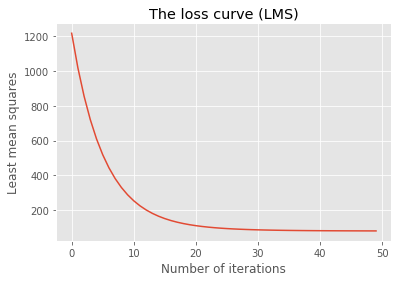

In [224]:
### Plot the loss the curve 
plt.plot(LMS_s)
plt.title("The loss curve (LMS)")
plt.xlabel("Number of iterations")
plt.ylabel("Least mean squares")
plt.show()

In [225]:
#### Compare the predicted with the optimal weights 
y_preds = np.dot(X_terms,weights)

In [226]:
#### Build a dataframe for the observed data and predicted one using the optimal weights. 
Results = pd.DataFrame({"Observed":pd.Series(y.flatten()),"Predicted":pd.Series(y_preds.flatten())})
Results.head()

,Observed,Predicted
0,24.0,15.885491
1,21.6,21.384393
2,33.4,20.003656
3,36.2,20.052494
4,22.9,18.387130
